In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from itertools import combinations


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Tim\anaconda3\envs\python39\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Tim\anaconda3\envs\python39\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Tim\anaconda3\envs\python39\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Tim\anaconda3\envs\python39\lib\site-packages\traitlets\config\application.py", line 1077, in launch_instance
    app.start

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Tim\anaconda3\envs\python39\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Tim\anaconda3\envs\python39\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Tim\anaconda3\envs\python39\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Tim\anaconda3\envs\python39\lib\site-packages\traitlets\config\application.py", line 1077, in launch_instance
    app.start

AttributeError: _ARRAY_API not found

: 

In [ ]:
def from_rolling_corr_to_date_pair_corr(rolling_corr: pd.DataFrame):
    pairs = list(combinations(rolling_corr.columns, 2))
    data_dict = {
        (date, f'{pair[0]}-{pair[1]}'): rolling_corr.loc[(date, pair[0]), pair[1]]
        for date in rolling_corr.index.levels[0] for pair in pairs
    }
    index = pd.MultiIndex.from_tuples(data_dict.keys(), names=['Date', 'Pair'])
    values = list(data_dict.values())
    return pd.DataFrame(values, index=index, columns=['Correlation'])

def get_forward_rolling_corr(ret: pd.DataFrame, window=20):
    rolling_corr = ret.rolling(window).corr().shift(-window*ret.shape[1]) # target alignement for day t
    return rolling_corr

def get_historical_rolling_corr(ret: pd.DataFrame, window=250):
    rolling_corr = ret.rolling(window).corr()
    return rolling_corr

In [ ]:
n225 = pd.read_csv('^N225-17-09-2014-29-05-2024.csv', index_col='Date', parse_dates=['Date'])['Adj Close'] # Nikkei 225
hsi = pd.read_csv('^HSI-17-09-2014-29-05-2024.csv', index_col='Date', parse_dates=['Date'])['Adj Close'] # Hang Seng
xwd = pd.read_csv('XWD.TO-17-09-2014-29-05-2024.csv', index_col='Date', parse_dates=['Date'])['Adj Close'] # MSCI World
eem = pd.read_csv('EEM-17-09-2014-29-05-2024.csv', index_col='Date', parse_dates=['Date'])['Adj Close'] # Emerging Markets
sp500 = pd.read_csv('^GSPC-17-09-2014-29-05-2024.csv', index_col='Date', parse_dates=['Date'])['Adj Close'] # S&P 500
dji = pd.read_csv('^DJI-17-09-2014-29-05-2024.csv', index_col='Date', parse_dates=['Date'])['Adj Close'] # Dow Jones
rui = pd.read_csv('^RUI-17-09-2014-29-05-2024.csv', index_col='Date', parse_dates=['Date'])['Adj Close'] # Russell 1000
stoxx600 = pd.read_csv('^STOXX-17-09-2014-29-05-2024.csv', index_col='Date', parse_dates=['Date'])['Adj Close'] # Stoxx 600
stoxx50 = pd.read_csv('^STOXX50E-17-09-2014-29-05-2024.csv', index_col='Date', parse_dates=['Date'])['Adj Close'] # Stoxx 50
ndx = pd.read_csv('^NDX-17-09-2014-29-05-2024.csv', index_col='Date', parse_dates=['Date'])['Adj Close'] # Nasdaq 100

n225.name = 'Nikkei 225'
hsi.name = 'Hang Seng'
xwd.name = 'MSCI World'
eem.name = 'Emerging Markets'
sp500.name = 'S&P 500'
stoxx600.name = 'Stoxx 600'
ndx.name = 'Nasdaq 100'

prices = pd.concat([n225, hsi, xwd, sp500, stoxx600, ndx], axis=1).ffill().bfill()
prices = prices[sorted(prices.columns)]
ret = prices / prices.shift() - 1.0
ret

,Hang Seng,MSCI World,Nasdaq 100,Nikkei 225,S&P 500,Stoxx 600
Date,,,,,,
2014-09-17,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,-0.008520,0.001428,0.007244,0.011260,0.004891,0.009843
2014-09-19,0.005687,-0.000570,-0.000729,0.015783,-0.000477,0.002128
2014-09-22,-0.014427,-0.000285,-0.009478,-0.007063,-0.008013,-0.005251
2014-09-23,-0.004943,-0.003710,-0.002379,0.000000,-0.005777,-0.013845
...,...,...,...,...,...,...
2024-05-23,-0.017029,-0.001854,-0.004374,0.012588,-0.007381,0.000729
2024-05-24,-0.013767,0.001161,0.009932,-0.011690,0.007001,-0.001898
2024-05-27,0.011737,0.002899,0.000000,0.006570,0.000000,0.003150


In [ ]:
histo_rolling_corr = get_historical_rolling_corr(ret, 250)
rolling_corr = get_forward_rolling_corr(ret, 20)
histo_pair_corr = from_rolling_corr_to_date_pair_corr(histo_rolling_corr)
pair_corr = from_rolling_corr_to_date_pair_corr(rolling_corr)
pair = 'Nikkei 225-S&P 500'
histo_pair_ts = histo_pair_corr.xs(pair, level='Pair')
pair_ts = pair_corr.xs(pair, level='Pair') # time series of rolling correlation for the pair Nikkei 225-S&P 500
pair_corr

Correlation
Date       Pair                             
2014-09-17 Hang Seng-MSCI World    -0.118413
           Hang Seng-Nasdaq 100     0.033593
           Hang Seng-Nikkei 225     0.191532
           Hang Seng-S&P 500       -0.080326
           Hang Seng-Stoxx 600      0.037101
...                                      ...
2024-05-29 Nasdaq 100-S&P 500            NaN
           Nasdaq 100-Stoxx 600          NaN
           Nikkei 225-S&P 500            NaN
           Nikkei 225-Stoxx 600          NaN
           S&P 500-Stoxx 600             NaN

[37845 rows x 1 columns]

<Figure size 1000x500 with 0 Axes>

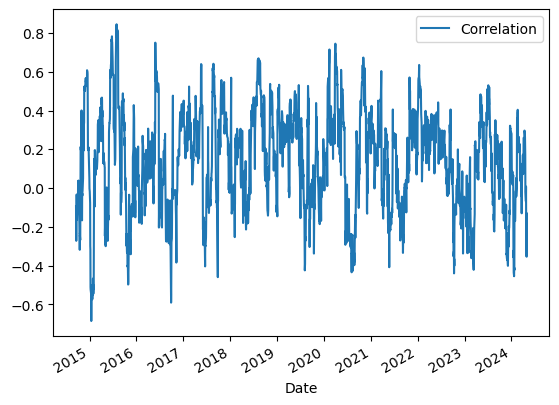

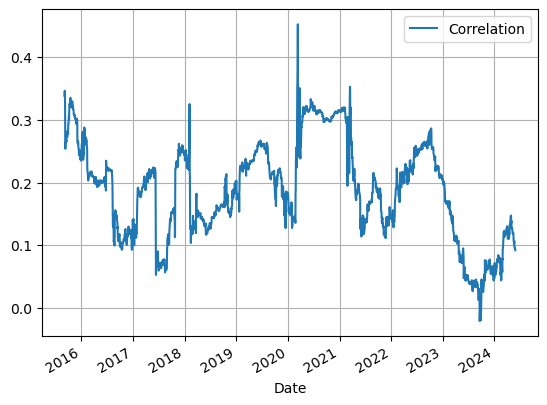

In [ ]:
plt.figure(figsize=(10, 5))
pair_ts.plot(label=f'20-days forward correlation for the pair {pair}')

histo_pair_ts.plot(label=f'250-days forward correlation for the pair {pair}')
plt.legend()
plt.grid()
plt.show()


# Comment shifter?

il faut faire:

```python
w = 20
ret.rolling(w).corr().shift(-w*prices.shape[1])
```

In [11]:
w = 3
prices = pd.DataFrame({
    't1': [1, 2, 1.2, 1.4, 1.3, 1.5, 1.6, 1.4],
    't2': [1, 2, 3.1, 3.2, 3.3, 2.9, 3.2, 3.1],
})
ret = prices / prices.shift() - 1
# I must use the .shift(-w*prices.shape[1])
pd.concat((ret.rolling(w).corr(), ret.rolling(w).corr().shift(-w*prices.shape[1])), axis=1)

t1        t2        t1        t2
0 t1       NaN       NaN  1.000000  0.558634
  t2       NaN       NaN  0.558634  1.000000
1 t1       NaN       NaN  1.000000 -0.907559
  t2       NaN       NaN -0.907559  1.000000
2 t1       NaN       NaN  1.000000 -0.452892
  t2       NaN       NaN -0.452892  1.000000
3 t1  1.000000  0.558634  1.000000 -0.562376
  t2  0.558634  1.000000 -0.562376  1.000000
4 t1  1.000000 -0.907559  1.000000 -0.194824
  t2 -0.907559  1.000000 -0.194824  1.000000
5 t1  1.000000 -0.452892       NaN       NaN
  t2 -0.452892  1.000000       NaN       NaN
6 t1  1.000000 -0.562376       NaN       NaN
  t2 -0.562376  1.000000       NaN       NaN
7 t1  1.000000 -0.194824       NaN       NaN
  t2 -0.194824  1.000000       NaN       NaN

In [14]:
# c'est exactement ce que l'on veut: à la date t, on veut prédire la correl entre t et t+window
prices = pd.DataFrame({
    't1': [1, 2, 1.2, 1.4],
    't2': [1, 2, 3.1, 3.2]
})
ret = prices / prices.shift() - 1
ret.corr()

,t1,t2
t1,1.000000,0.558634
t2,0.558634,1.000000


In [15]:
prices = pd.DataFrame({
    't1': [2, 1.2, 1.4, 1.3],
    't2': [2, 3.1, 3.2, 3.3]
})
ret = prices / prices.shift() - 1
ret.corr()

,t1,t2
t1,1.000000,-0.907559
t2,-0.907559,1.000000
